##  small example of linear regression
> https://pythonsansar.com/linear-regression-machine-learning-examples/

## above "main" combined with:
> https://www.geeksforgeeks.org/multiple-linear-regression-with-scikit-learn/
> https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python#3D+%20linear%20regression%20with%20scikit-learn

In [1]:
info = {
    'no of hours' : [1, 2, 5, 7, 8, 10, 12, 15, 17],
    'age' : [20, 34, 21, 27, 34, 21, 20, 45, 31],
    'salary' : [1000, 3000, 5000, 8000, 8500, 9000, 12000, 15000, 22000]
}
import pandas as pd

# so here we fit the "info" dictionary into a pandas dataframe
df = pd.DataFrame(info)
print(df)

   no of hours  age  salary
0            1   20    1000
1            2   34    3000
2            5   21    5000
3            7   27    8000
4            8   34    8500
5           10   21    9000
6           12   20   12000
7           15   45   15000
8           17   31   22000


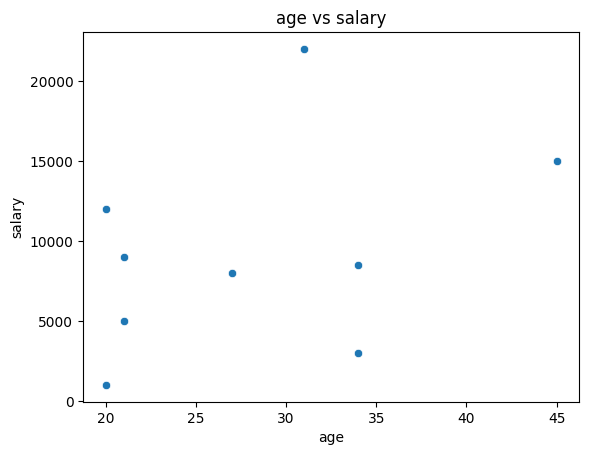

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = "age", y= "salary", data = df)
plt.xlabel("age")
plt.ylabel("salary")
plt.title("age vs salary")
plt.show()

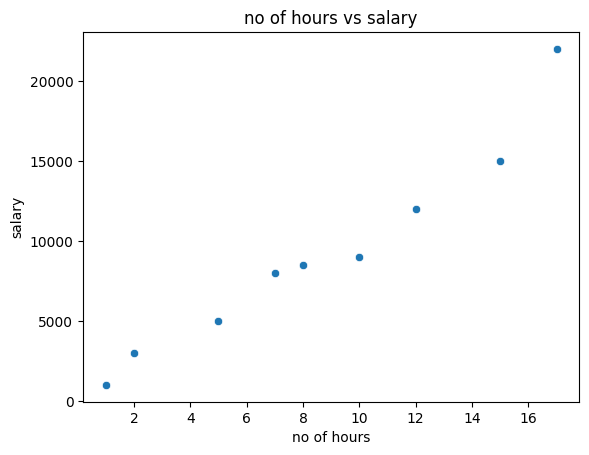

In [180]:
sns.scatterplot(x = "no of hours", y= "salary", data = df)
plt.xlabel("no of hours")
plt.ylabel("salary")
plt.title("no of hours vs salary")
plt.show()

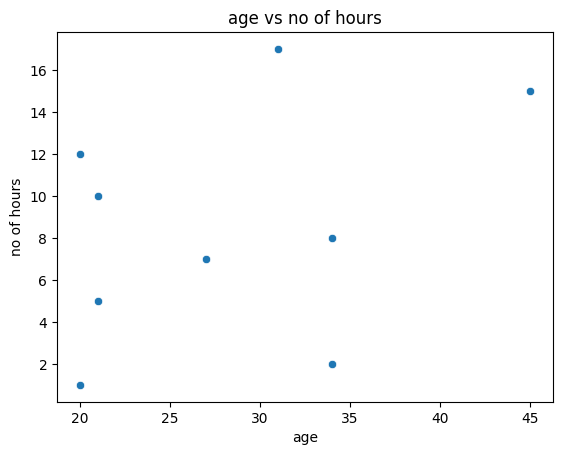

In [178]:
sns.scatterplot(x = "age", y= "no of hours", data = df)
plt.xlabel("age")
plt.ylabel("no of hours")
plt.title("age vs no of hours")
plt.show()

Now, we will use a linear regression model to predict the salary based on the hours and age. 
The equation used will be in the form of:

salary = Øo + Ø1 * no of hours + Ø2 * age

> Øo = Intercept

> Ø1 = Coefficient of no of hours

> Ø2 = Coefficient of age

In [28]:
# with pandas
# Now, we will start building the model. Let’s select the features and target variables:
X = df.iloc[:, :2]
y = df.iloc[:, -1]

In [29]:
# salary
y

0     1000
1     3000
2     5000
3     8000
4     8500
5     9000
6    12000
7    15000
8    22000
Name: salary, dtype: int64

In [30]:
# no (number) of hours and age
X

,no of hours,age
0,1,20
1,2,34
2,5,21
3,7,27
4,8,34
5,10,21
6,12,20
7,15,45
8,17,31


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [52]:
# Now, splitting datasets into training and testing datasets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [53]:
X_test

,no of hours,age
0,1,20
7,15,45
2,5,21


In [54]:
X_train

,no of hours,age
3,7,27
4,8,34
6,12,20
5,10,21
8,17,31
1,2,34


In [86]:
# Create linear regression object
lr = LinearRegression()
# train the model
model = lr.fit(X_train, y_train)
# making predictions
pred = model.predict(X_test)
print(pred)

[-2468.57272521 22078.85182664  3040.27683231]


In [87]:
#Now, let’s see the values of Øo, Ø1, and Ø2
print("Intercept Øo:",model.intercept_)

Intercept Øo: -8683.571590651232


In [88]:
print("Slope :", model.coef_)

Slope : [1315.97458589  244.95121398]


In [89]:
# Ø1 -> coefficient of no of hours = 1315.97458589
# Ø2 -> coefficient of age = 244.95121398

In [92]:
# the same as with print above but looking better:
list(zip(X, model.coef_))

[('no of hours', 1315.9745858860902), ('age', 244.95121397776248)]

### Interpretation - going back to the original model:
salary = Øo + Ø1 * no of hours + Ø2 * age 
<br> salary (y) = Øo (Intercept) + Ø1 (coefficient of no of hours) * no of hours + Ø2 (coefficient of age) * age
<br> salary (y) = -8683.571590651232 + 1315.97458589 * no of hours + 244.95121398 * age


In [134]:
# model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('mean_squared_error : ', mean_squared_error(y_test, pred))
print('mean_absolute_error : ', mean_absolute_error(y_test, pred))
# The coefficient of determination: 1 is perfect prediction
#print("Coefficient of determination: %.2f" % r2_score(y_test, pred))
r2 = r2_score(y_test, pred)
print("Coefficient of determination: ", r2)


mean_squared_error :  21993884.942519527
mean_absolute_error :  4169.049239845698
Coefficient of determination:  0.3655610112734752


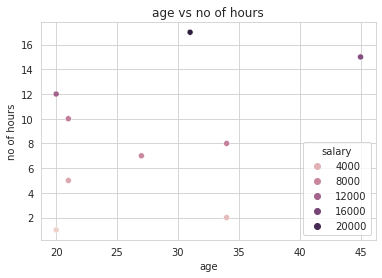

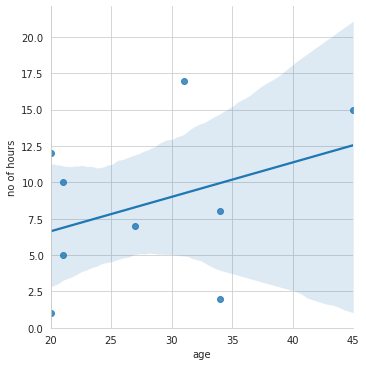

In [76]:
# plotting with seaborn

# dataset
df
dataset.head()

sns.scatterplot(x = "age", y= "no of hours", data = df, hue ='salary')
plt.xlabel("age")
plt.ylabel("no of hours")
plt.title("age vs no of hours")
plt.show()

# lmplot() can be understood as a function that basically creates a linear model plot. 
# lmplot() makes a very simple linear regression plot. It creates a scatter plot, 
# calculates the linear fit based on the data and with a linear fit on top of it:

sns.set_style('whitegrid')
sns.lmplot(x ='age', y ='no of hours', data = df)

### but this last plot is a simple regression, not the trained regression we calculated above

### Create Linear Regression using the regplot() method in seaborn
# The whole purpose of the regplot() function is to build and visualize a linear regression model for your data. 
# The regplot() stands for regression plot.

### however, we can not plot more than 2D (and X is 2 values per datapoint: no of hours and age)

### To plot more than 2D datasets:<br>
https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

In [171]:
######################## Prepare model data point for visualization ###############################

import numpy as np

x = df.iloc[:, 0]
y = df.iloc[:, 1]
z = df.iloc[:, 2]

print("x =", np.shape(x))
print("y =", np.shape(y))
print("z =", np.shape(z))

x_pred = np.linspace(0, 17, 20)   # range of no of hours values
y_pred = np.linspace(10, 45, 20)  # range of age values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T


print("x_pred =", np.shape(x_pred))
print("xx_pred =", np.shape(xx_pred))
print("y_pred =", np.shape(y_pred))
print("yy_pred =", np.shape(yy_pred))

print("model_viz =", np.shape(model_viz))

x = (9,)
y = (9,)
z = (9,)
x_pred = (20,)
xx_pred = (20, 20)
y_pred = (20,)
yy_pred = (20, 20)
model_viz = (400, 2)


In [141]:
pred

array([-2468.57272521, 22078.85182664,  3040.27683231])

In [176]:
# In order to make the scatterplot below, we must have the same number of elements on xx_pred.flatten(),
# yy_pred.flatten(), pred. 
# As pred was only computed based on the X_test subset of the data (3 data points out of the original 9), 
# have to recalculate x to provide enough "pred" (predicted data) to be plotted.
# In order to do that, I recalculate the linear regression prediction with the full dataset that has to be 
#projected in order to create the meshgrid (model_viz instead of X_test):

full_pred = model.predict(model_viz)
print("full_pred =", np.shape(full_pred))
print("model_viz =", np.shape(model_viz))



full_pred = (400,)
model_viz = (400, 2)


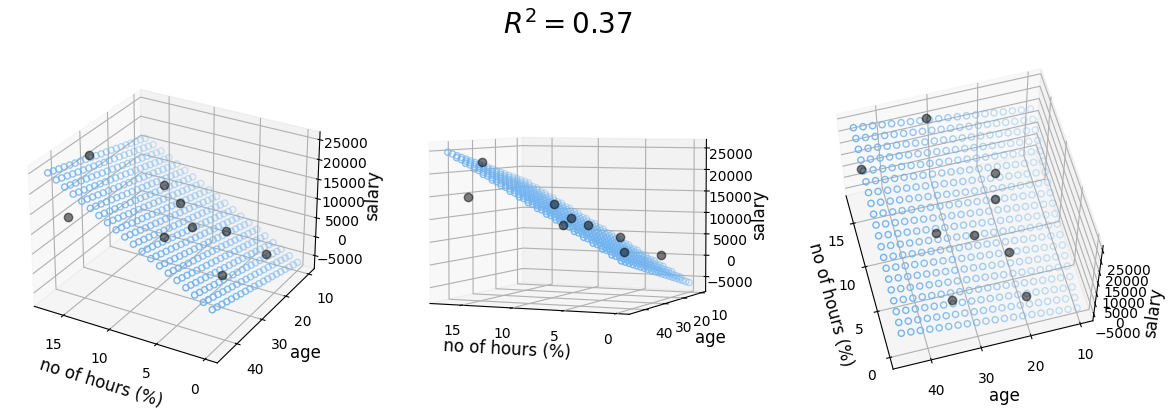

In [177]:


############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), full_pred, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('no of hours (%)', fontsize=12)
    ax.set_ylabel('age', fontsize=12)
    ax.set_zlabel('salary', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()


# CONCLUSION: So now I should be able to use this script to analyze data from SOMNET using the linear regression machine learning approach

In [181]:
# The full-rotation view of linear models are constructed below in a form of gif. 

for ii in np.arange(0, 360, 1):
    ax.view_init(elev=32, azim=ii)
    fig.savefig('gif_image%d.png' % ii)

In [187]:
ls *.png | wc

    360     360   10334


In [242]:
from PIL import Image
import glob

# Create the frames
frames = []
imgs = glob.glob("*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('png_to_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=360, loop=0)

# this cell has to be a markdown for the command to display the gif
## the 
<img src="png_to_gif.gif" width="750" align="center">

In [265]:
# Save into a GIF file that loops forever
frames[0].save('png_to_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=2, loop=10000)
